# Basic LSTM research, using made up data
Please do not use this in any production

In [27]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot as plt 
import pandas
import numpy as np

# Import data and visualize

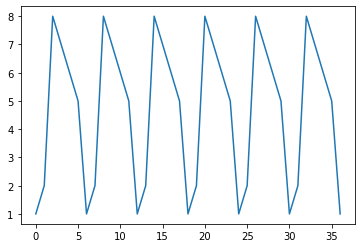

In [6]:
data = pandas.read_csv('basic_lstm.csv')
plt.plot(data)

# Data preprocessing
We got a time-series value of [1, 2, 5, 1, 2 ...],
obviously we should make it to X: [[1, 2, 5], [2, 5, 1], ...], Y: [1, 2] ...] 

In [111]:
window_size = 6
X = []
y = []
for i in range(0, len(data) - window_size):
    X.append(list(data['value'].iloc[i : i+window_size]))
    y.append(data['value'].iloc[i+window_size])

arr_y = np.array(y)
labels = np.unique(y)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()
tmp = []
for i in range(len(X)):
    X[i] = le.transform(X[i])
    tmp.append(ohe.transform(X[i].reshape(-1,1)).toarray())
X = np.array(tmp)

array([[[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]],

       [[0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.

# Prepare model

In [112]:
model = Sequential(
    [
        LSTM(4, input_shape=(window_size, window_size), activation='relu'),
        Dense(len(labels), activation='softmax')
    ]
)
model.compile(loss="categorical_crossentropy", optimizer='adam')

# Train model

In [113]:
# Train model
model.fit(X, y, epochs=300)

Epoch 1/100
1/1 [==============================] - 0s 954us/step - loss: 1.7951
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7946
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 1.7940
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 1.7935
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7930
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7924
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7919
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.7914
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 1.7908
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 1.7903
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7898
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7892
Epoch 13/100
1/1 [==============================] - 0s 8ms/

# Test model prediction

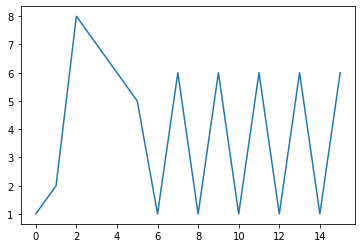

In [121]:
x_pred = np.array([1, 2, 8, 7, 6, 5])
# now plot prediction on models
y_result = list(x_pred.copy())
for i in range(0, 10):
    x = le.transform(x_pred)
    x = ohe.transform(x.reshape(-1, 1)).toarray().reshape(1, -1, window_size)
    vector = model.predict(x)[0]
    predict_y = labels[np.argmax(vector)]
    y_result.append(predict_y)
    # circle push-pop
    x_pred = np.delete(x_pred, 0)
    x_pred = np.append(x_pred, [predict_y])
plt.plot(y_result)